# The Poisson Regression
## The associated data is in the file khakichinos.csv. Estimate all relevant parameters for Poisson regression using MLE. Report your code, the estimated parameters and the maximum value of the log-likelihood. Predict the number of people with 0, ..., 23 exposures based on the Poisson regression. Explain how the predicted values are obtained using the case of 2 exposures (show your calculations). Graph the original and predicted numbers of exposures.

In [1]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import minimize
from scipy.stats import chi2

<hr style="border:2px solid black">
<b>Read in the data and drop ID</b>
<hr style="border:2px solid black">

In [2]:
chikak = pd.read_csv("khakichinos.csv")
chikak =chikak.drop(columns=['ID'])

In [3]:
chikak

,NumberofVisits,LnInc,Sex,LnAge,HHSize
0,0,11.379394,1,3.871201,2
1,5,9.769956,1,4.043051,1
2,0,11.082143,0,3.332205,2
3,0,10.915088,1,3.951244,3
4,0,10.915088,1,2.833213,3
...,...,...,...,...,...
2723,0,9.528794,1,2.944439,2
2724,0,11.379394,0,3.970292,2
2725,0,11.191342,1,3.044522,3
2726,0,10.532096,1,2.890372,4


<hr style="border:2px solid black">
<b>Define the funtions needed</b><br>
<b>1. the log-likelihood</b>
<hr style="border:2px solid black">

In [4]:
def lreg_p (params, noVisits, LcInc, Sex, lnAge, HHSize):
    lam, b1, b2, b3, b4 = params
    
    lam_i= []
    prob = []
    ln_prob = []
    
    pds = list(range(0, len(Sex)))
    for i in pds:
        lam_i.append(lam * (np.exp((LcInc[i]*b1)+(Sex[i]*b2)+(lnAge[i]* b3) + (HHSize[i]*b4))))
        prob.append(poisson.pmf(noVisits[i],lam_i[i]))
        ln_prob.append(np.log(prob[i]))
        

    return sum(ln_prob)
            
    

<hr style="border:2px solid black">
<b>2. the negative of the log-likelihood</b>
<hr style="border:2px solid black">

In [5]:
def n_lreg_p (params, noVisits, LcInc, Sex, lnAge, HHSize):
    return(-np.sum(lreg_p (params, noVisits, LcInc, Sex, lnAge, HHSize)))

<hr style="border:2px solid black">
<b>Specify the information needed for the optimizer</b>
<hr style="border:2px solid black">

In [6]:
noVisits = chikak.NumberofVisits
LcInc = chikak.LnInc
Sex = chikak.Sex
lnAge = chikak.LnAge
HHSize= chikak.HHSize
params = np.array((0.01,0.01,0.5,0.01,0.01))

In [7]:
n_lreg_p(params,noVisits, LcInc, Sex, lnAge, HHSize)

14360.607625064322

<hr style="border:2px solid black">
<b>Call the optimizer</b>
<hr style="border:2px solid black">

In [8]:
res_pois = minimize(
    n_lreg_p,
    params,
    tol=1e-10,
    options={'ftol' : 1e-8},
    #bounds=[(None, None), (None, None), (None, None), (None, None),(None, None)],
    args = (noVisits, LcInc, Sex, lnAge, HHSize)
)

C:\Users\Phuc Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: ftol
  import sys
C:\Users\Phuc Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
C:\Users\Phuc Le\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Phuc Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


<hr style="border:2px solid black">
<b>Review the result</b>
<hr style="border:2px solid black">

In [9]:
res_pois

      fun: 6291.496746509581
 hess_inv: array([[ 2.07045274e-05, -2.30818672e-05,  2.80150026e-06,
        -7.85559317e-06, -6.19638709e-05],
       [-2.30818672e-05,  2.72342397e-05, -5.36300715e-06,
         1.21359175e-05,  7.00115071e-05],
       [ 2.80150026e-06, -5.36300715e-06,  5.97712951e-06,
        -5.65323214e-06, -1.11279421e-05],
       [-7.85559317e-06,  1.21359175e-05, -5.65323214e-06,
         1.73260315e-05,  2.20107060e-05],
       [-6.19638709e-05,  7.00115071e-05, -1.11279421e-05,
         2.20107060e-05,  1.88497869e-04]])
      jac: array([-0.00634766, -0.00250244,  0.00091553, -0.0010376 , -0.00079346])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 57
     njev: 117
   status: 2
  success: False
        x: array([ 0.04388074,  0.09383033,  0.00426099,  0.58825278, -0.03590714])

<hr style="border:2px solid black">
<b>Get lambda, beta 1, beta 2, beta 3, and beta 4</b>
<hr style="border:2px solid black">

In [10]:
lam = res_pois.x[0]

b1 = res_pois.x[1]
b2 = res_pois.x[2]
b3 = res_pois.x[3]
b4 = res_pois.x[4]

lam,b1,b2,b3,b4

(0.04388074313500104,
 0.0938303345462834,
 0.0042609943202975625,
 0.5882527837937217,
 -0.03590714410736579)

<b>The estimated parameters for Poisson model: lambda = 0.0439, beta 1(Lnlnc) = 0.0938, beta 2(Sex) = 0.0043, beta 3(LnAge) = 0.5882, and beta 4(HHSize) =-0.0359 and with the maximum value of the log-likelihood being approximately -6291.497<b>

<b>Get total numbers of visits <b>

In [11]:
Actual = chikak.groupby(['NumberofVisits']).size().reset_index().rename(columns={0:'Actual'})

In [12]:
total_vis = chikak.NumberofVisits.sum()

In [13]:
total_vis 

2590

<hr style="border:2px solid black">
<b>Define a function to make predictions</b>
<hr style="border:2px solid black">

In [14]:
pred_count = {}
prob = {}
ln_prob = {}
for visits in range(0, len(noVisits)):
    pred_count[visits] = lam*np.exp((LcInc[visits]*b1)+(Sex[visits]*b2)+
                                (lnAge[visits]*b3)+(HHSize[visits]*b4))
    prob[visits] = poisson.pmf(noVisits[visits],pred_count[visits])
    ln_prob[visits] = np.log(prob[visits])
    # Calculate the probability of 'visits' number of occurrences for each individual
    #chikak[f'prob_of_{visits}_visits'] = poisson.pmf(visits, lam)
    #pred_count[visits] = chikak[f'prob_of_{visits}_visits'].sum()

In [15]:
prob

{0: 0.3124957895240187,
 1: 0.00525369030032572,
 2: 0.4402956160065669,
 3: 0.32429699318400323,
 4: 0.5580128820881886,
 5: 0.5378525503540627,
 6: 0.36526984059850276,
 7: 0.34977492819166495,
 8: 0.26725176524894684,
 9: 0.34764711462623576,
 10: 0.36488308309761364,
 11: 0.3047100332224198,
 12: 0.0531709201638789,
 13: 0.3729883636545552,
 14: 0.42744328956751676,
 15: 0.3529134185095952,
 16: 0.20265355845061891,
 17: 0.3177714035980196,
 18: 0.00020085050071659555,
 19: 0.40863814905963014,
 20: 0.1316311231876794,
 21: 0.4064439097208964,
 22: 0.41327131141858214,
 23: 0.2105990720524438,
 24: 0.22987928159166768,
 25: 0.2737789140308803,
 26: 0.4441811437584512,
 27: 0.27372194359006646,
 28: 0.3554820411724125,
 29: 0.4175593280812073,
 30: 0.42756227495968097,
 31: 0.5325986658032831,
 32: 0.4560931309720689,
 33: 0.47865836491289515,
 34: 0.42039936350076057,
 35: 0.3098237639284011,
 36: 0.1720607384992467,
 37: 0.20385008779525918,
 38: 0.34567860545283735,
 39: 0.621350

<b>Make predictions<b>

In [16]:
chikak['lam']=pd.Series(pred_count)

In [17]:
chikak['prob']=pd.Series(prob)
chikak['ln_prob'] = pd.Series(ln_prob)

In [18]:
chikak

,NumberofVisits,LnInc,Sex,LnAge,HHSize,lam,prob,ln_prob
0,0,11.379394,1,3.871201,2,1.163164,0.312496,-1.163164
1,5,9.769956,1,4.043051,1,1.146976,0.005254,-5.248825
2,0,11.082143,0,3.332205,2,0.820309,0.440296,-0.820309
3,0,10.915088,1,3.951244,3,1.126096,0.324297,-1.126096
4,0,10.915088,1,2.833213,3,0.583373,0.558013,-0.583373
...,...,...,...,...,...,...,...,...
2723,0,9.528794,1,2.944439,2,0.566845,0.567312,-0.566845
2724,0,11.379394,0,3.970292,2,1.227738,0.292954,-1.227738
2725,0,11.191342,1,3.044522,3,0.677935,0.507664,-0.677935
2726,0,10.532096,1,2.890372,4,0.561498,0.570354,-0.561498


In [19]:
predicted_counts = {}
prob_2 ={}
p2= {}
p3 = {}
predict ={}
for visits in range(0, 23):
    
    # Calculate the probability of 'visits' number of occurrences for each individual
    prob_2[visits] = chikak.loc[ chikak['NumberofVisits'] == visits, 'prob'].sum()
    predicted_counts[visits] = prob[visits].sum()
    p2[visits] = chikak.loc[ chikak['NumberofVisits'] == visits, 'NumberofVisits'].count()
    p3[visits] = prob_2[visits]/p2[visits]
    predict[visits] = p3[visits]*total_vis

C:\Users\Phuc Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
C:\Users\Phuc Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [20]:
predict

{0: 1053.2392941598237,
 1: 923.243750699181,
 2: 479.31892202452076,
 3: 166.5635402427575,
 4: 44.57447941169917,
 5: 11.753254190952747,
 6: 1.9733727869493947,
 7: 0.5022586876215845,
 8: 0.06405504436314871,
 9: 0.008349476028822226,
 10: 0.00043393690148484137,
 11: 0.000301114934644122,
 12: 3.6232425346059214e-06,
 13: nan,
 14: 4.030050855767539e-08,
 15: 8.02972256011918e-09,
 16: 8.16237505317831e-10,
 17: 6.033892291567501e-13,
 18: 5.549593632841971e-15,
 19: nan,
 20: 2.2197381690787592e-16,
 21: 7.7870267575215e-17,
 22: 2.1469743010892738e-19}

<b>The predicted values are obtained using the case of 2 number of visit is 479.318<b>

<b>Read data set again<b>

In [21]:
chikak

,NumberofVisits,LnInc,Sex,LnAge,HHSize,lam,prob,ln_prob
0,0,11.379394,1,3.871201,2,1.163164,0.312496,-1.163164
1,5,9.769956,1,4.043051,1,1.146976,0.005254,-5.248825
2,0,11.082143,0,3.332205,2,0.820309,0.440296,-0.820309
3,0,10.915088,1,3.951244,3,1.126096,0.324297,-1.126096
4,0,10.915088,1,2.833213,3,0.583373,0.558013,-0.583373
...,...,...,...,...,...,...,...,...
2723,0,9.528794,1,2.944439,2,0.566845,0.567312,-0.566845
2724,0,11.379394,0,3.970292,2,1.227738,0.292954,-1.227738
2725,0,11.191342,1,3.044522,3,0.677935,0.507664,-0.677935
2726,0,10.532096,1,2.890372,4,0.561498,0.570354,-0.561498


<b><hr style="border:2px solid black">
<b>Plot the actual values and predictions</b>
<hr style="border:2px solid black"><b>

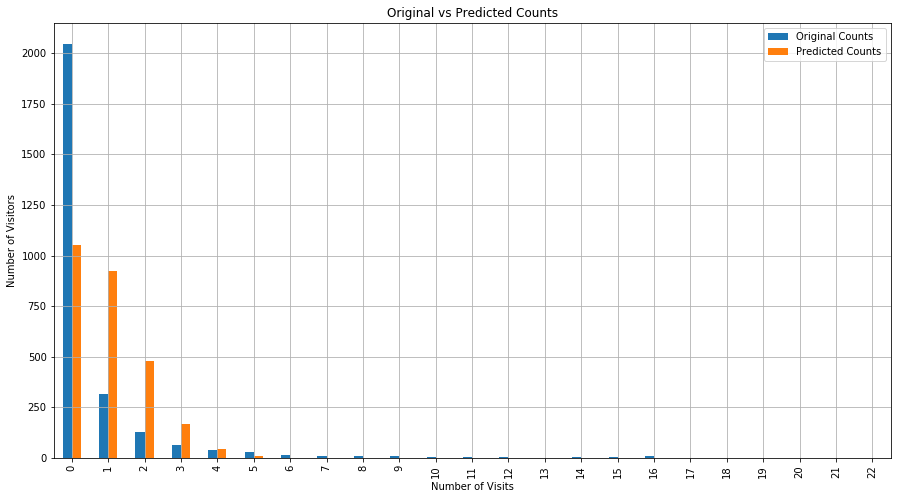

In [22]:
plot_data = pd.DataFrame({
    'Original Counts': pd.Series(p2),
    'Predicted Counts': pd.Series(predict)
})
import matplotlib.pyplot as plt
plot_data.plot(kind='bar', stacked=False,figsize=(15, 8))
plt.xlabel('Number of Visits')
plt.ylabel('Number of Visitors')
plt.title('Original vs Predicted Counts')
plt.legend()
plt.grid(True)
plt.show()

<b>The graph above displays the original versus the predicted counts across different exposure levels. The original counts are shown in blue, while the predicted counts, based on the Poisson Regression with the estimated parameter, are shown in orange.<b>